# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Syah Ridho Natiqoh
- **Email:** ridhonatiqoh@gmail.com
- **ID Dicoding:** Syah Ridho Natiqoh

## Menentukan Pertanyaan Bisnis




- Bagaimana korelasi pengaruh musim terhadap traffic penyewaan sepeda?
- Bagaimana korelasi pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana distribusi volume penyewaan sepeda pada setiap jam dalam satu hari?








## Import Semua Packages/Library yang Digunakan

In [2]:
#Melakukan import seluruh libraries yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Matplotlib is building the font cache; this may take a moment.


## Data Wrangling

### Gathering Data

In [5]:
#Memanggil data csv dari basis DAY dan HOUR
day_df = pd.read_csv('dataset/day.csv')
hour_df = pd.read_csv('dataset/hour.csv')

# Menampilkan 5 data teratas
print("BASIS DATA PENYEWAAN SEPEDA DALAM BASIS HARIAN")
day_df.head()

BASIS DATA PENYEWAAN SEPEDA DALAM BASIS HARIAN


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Menampilkan 5 data teratas
print("BASIS DATA PENYEWAAN SEPEDA DALAM BASIS JAM")
hour_df.head()

BASIS DATA PENYEWAAN SEPEDA DALAM BASIS JAM


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset basis hour dan day telah tertampil sebagai bahan untuk diolah ke tahap selanjutnya, yakni assesing data dan cleaning data agar data dapat divisualisasikan guna menjawab pertanyaan bisnis yang telah diatur.


### Assessing Data

- Assesing data **day basis**

In [ ]:
# Memeriksa tipe data dari kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Menjalankan code untuk memeriksa ringkasan parameter statistik dari day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Assesing data **hour basis**

In [ ]:
# Memeriksa tipe data dari kolom yang terdapat dalam hour_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Menjalankan code untuk memeriksa ringkasan parameter statistik dari hour_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Memeriksa nilai yang hilang dan duplikat pada dataset hour dan day basis

# Day Basis
print("Nilai yang hilang pada dataset day_df adalah:")
print(day_df.isna().sum())
print("\nNilai duplikat pada dataset day_df adalah:")
print(day_df.duplicated().sum())

# Hour Basis
print("\nNilai yang hilang pada dataset hour_df adalah:")
print(hour_df.isna().sum())
print("\nNilai duplikat pada dataset hour_df adalah:")
print(hour_df.duplicated().sum())

Nilai yang hilang pada dataset day_df adalah:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Nilai duplikat pada dataset day_df adalah:
0

Nilai yang hilang pada dataset hour_df adalah:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Nilai duplikat pada dataset hour_df adalah:
0


**Insight:**
- Berdasarkan proses assesing data, diperoleh tidak ada data yang mengalami masalah sehingga data dapat diproses untuk dilakukan visualisasi data tanpa melalui proses cleaning data.


### Cleaning Data

**Insight:**
- Pada proses ASSESING DATA tidak ditemukan data yang bermasalah sehingga proses CLEANING DATA dapat dilewati.

## Exploratory Data Analysis (EDA)

### Explore **day_df dataset**






In [ ]:
# Menemukan data korelasi antara musim dengan jumlah penyewaan sepeda
# dalam rentang 2 tahun, dengan menggunakan dataset day_df

average_usage_season = day_df.groupby('season')['cnt'].mean()

# Insight dari korelasi musim dengan jumlah penyewaan sepeda
most_rentals_season = average_usage_season.idxmax()

# Output gabungan
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
most_rentals_season_name = season_mapping[most_rentals_season]

print("Rata-rata penyewaan sepeda per musim:")
print(average_usage_season)
print(f"\nMusim dengan jumlah penyewaan sepeda tertinggi: {most_rentals_season_name} season")


Rata-rata penyewaan sepeda per musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Musim dengan jumlah penyewaan sepeda tertinggi: fall season


In [ ]:
# Menampilkan korelasi data dari rata-rata jumlah penyewaan berdasarkan weather
average_usage_weather = day_df.groupby('weathersit')['cnt'].mean()

# Insight dari korelasi weather dengan jumlah penyewaan sepeda
most_rentals_weather = average_usage_weather.idxmax()

#Output
weather_mapping = {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
                  2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                  3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                  4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}

most_rentals_weather_name = weather_mapping[most_rentals_weather]
print("Rata-rata penyewaan sepeda per cuaca:")
print(average_usage_weather)
print(f"\nCuaca dengan jumlah penyewaan sepeda tertinggi: {most_rentals_weather_name}")


Rata-rata penyewaan sepeda per cuaca:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

Cuaca dengan jumlah penyewaan sepeda tertinggi: Clear, Few clouds, Partly cloudy, Partly cloudy


### Explore **hour_df dataset**

In [ ]:
# Menampilkan dataset berbasis hour untuk menganalisis korelasi volume
# penyewaan sepeda tiap jamnya dalam satu hari

# Rata-rata jumlah penyewaan per jam
average_hourly_usage = hour_df.groupby('hr')['cnt'].mean()
average_hourly_usage

most_hourly_rentals = average_hourly_usage.idxmax()

print("Rata-rata penyewaan sepeda per jam:")
print(average_hourly_usage)
print(f"\nJam dengan jumlah penyewaan sepeda tertinggi jam {most_hourly_rentals}.00")


Rata-rata penyewaan sepeda per jam:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

Jam dengan jumlah penyewaan sepeda tertinggi jam 17.00


**Insight:**
- Musim dengan jumlah penyewaan sepeda tertinggi **fall** season
- Cuaca dengan jumlah penyewaan sepeda tertinggi **Clear, Few clouds, Partly cloudy, Partly cloudy**
- Jam dengan jumlah penyewaan sepeda tertinggi **jam 17.00**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana korelasi pengaruh musim dan cuaca terhadap traffic penyewaan sepeda?


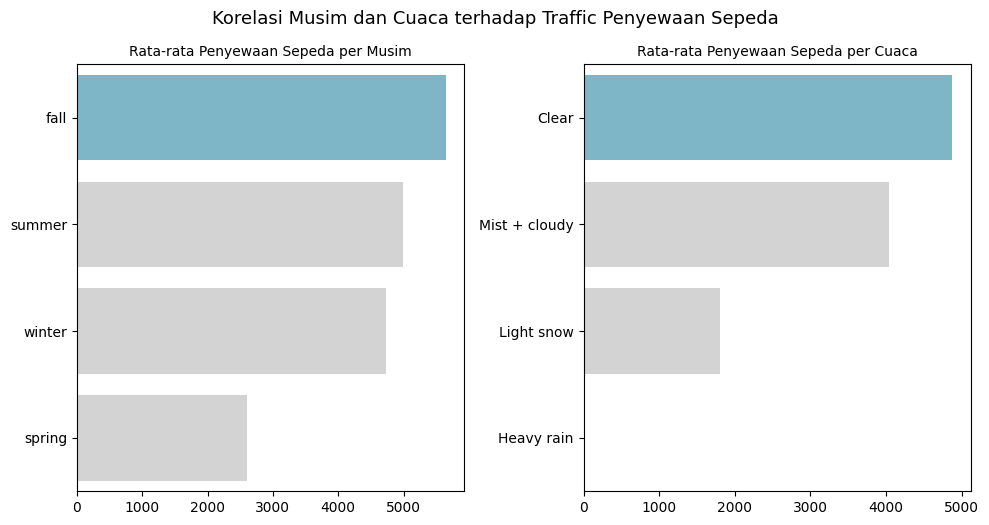

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Warna untuk musim
colors_1 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Memperbaiki season_mapping
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}

# Menghitung rata-rata penggunaan per musim
average_usage_season = day_df.groupby('season')['cnt'].mean()

# Mengurutkan berdasarkan nilai rata-rata dari terkecil hingga terbesar
average_usage_season = average_usage_season.sort_values(ascending=False)

# Membuat plot dengan nama musim, bukan angka
season_labels = [season_mapping[season] for season in average_usage_season.index]

sns.barplot(y=season_labels, x=average_usage_season.values, palette=colors_1, ax=ax[0], hue=weather_labels, legend=False)
ax[0].set_title('Rata-rata Penyewaan Sepeda per Musim', loc='center', fontsize=10)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='y', labelsize=10)

# Warna untuk cuaca
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Memperbaiki weather_mapping
weather_mapping = {1: "Clear", 2: "Mist + cloudy", 3: "Light snow", 4: "Heavy rain"}

# Menghitung rata-rata penggunaan per cuaca
average_usage_weather = day_df.groupby('weathersit')['cnt'].mean()

# Menambahkan kategori cuaca 4 dengan nilai 0 jika tidak ada dalam data
if 4 not in average_usage_weather.index:
    average_usage_weather.loc[4] = 0

# Pastikan urutannya adalah 1, 2, 3, 4
average_usage_weather = average_usage_weather.sort_index()

# Membuat plot dengan nama cuaca, termasuk kategori cuaca 4 dengan nilai 0
weather_labels = [weather_mapping[weather] for weather in average_usage_weather.index]

sns.barplot(y=weather_labels, x=average_usage_weather.values, palette=colors, ax=ax[1],hue=weather_labels, legend=False)
ax[1].set_title('Rata-rata Penyewaan Sepeda per Cuaca', loc='center', fontsize=10)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.suptitle('Korelasi Musim dan Cuaca terhadap Traffic Penyewaan Sepeda', fontsize=13, y=1.04)
plt.show()


### Pertanyaan 2: Bagaimana distribusi volume penyewaan sepeda pada setiap jam dalam satu hari?

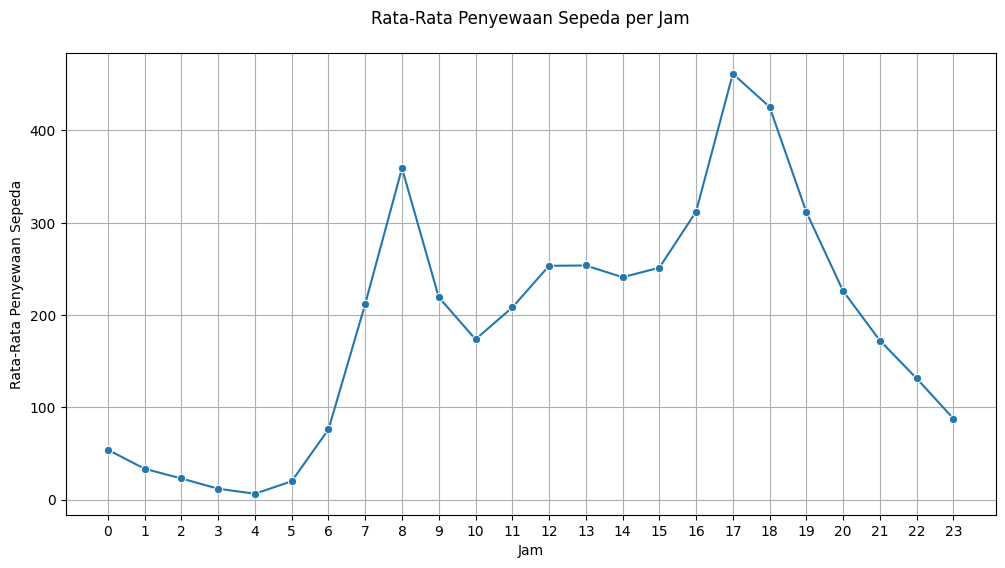

>> Jam dengan jumlah penyewaan sepeda tertinggi: 17:00


In [ ]:
# Menghitung rata-rata penyewaan sepeda untuk setiap jam dalam sehari
avg_hourly_rentals = hour_df.groupby('hr')['cnt'].mean()

# Menampilkan pola penggunaan sepeda per jam dalam satu hari menggunakan grafik garis
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_hourly_rentals.index, y=avg_hourly_rentals.values, marker='o')
plt.title('Rata-Rata Penyewaan Sepeda per Jam\n')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.xticks(range(0, 24)) # Membuat range jam 00.00 - 24.00 (1 hari)
plt.grid(True) # Menampilkan garis-garis untuk memudahkan membaca line chart
plt.show() # Menampilkan line chart

# Menentukan jam dengan jumlah penyewaan sepeda paling tinggi
busiest_hour = avg_hourly_rentals.idxmax()
print(f">> Jam dengan jumlah penyewaan sepeda tertinggi: {busiest_hour}:00")


**Insight:**
- Fall season dan cuca cerah menjadi top teratas dalam tingginya volume penyewaan sepeda
- Pada plot grafik penyewaan sepeda per jam (dalam satu hari) menampilkan dua titik puncak yakni jam 8.00 dan 17.00

## Conclusion

- Conclution pertanyaan 1: **Musim gugur** dan **cuaca cerah** menjadikan jumlah penyewaan sepeda **sangat tinggi**, perusahan mesti memberikan planning untuk menyediakan jumlah sepeda agar dapat memenuhi kebutuhan pada kondisi tersebut sehingga perusahaan memperoleh revenue yang tinggi.
- Conclution pertanyaan 2: Berdasarkan plot grafik traffic penyewaan sepeda dalam satu hari terlihat bahwa angka **penyewaan sepeda memuncak pada jam 8 dan jam 17**. Hal tersebut dikarenakan **waktu pergi dan pulang kerja**.